# 1 - Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# 2 - Read the Dataset

In [ ]:
# Mount Google Drive to access all files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
RFL_data = pd.read_csv("/content/drive/MyDrive/DS Capstone/Dataset/RFLData.csv")
RFL_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111041 entries, 0 to 111040
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   RFL_Att                 111041 non-null  float64
 1   Temperature             111041 non-null  float64
 2   Relative Humidity       111041 non-null  float64
 3   Visibility (m)          111041 non-null  float64
 4   Temperature Difference  111041 non-null  float64
 5   Absolute Humidity       111041 non-null  float64
 6   Time                    111041 non-null  int64  
 7   Frequency               111041 non-null  int64  
 8   Distance                111041 non-null  float64
 9   Rain Intensity          111041 non-null  float64
 10  SYNOP Code              111041 non-null  int64  
 11  Unnamed: 11             0 non-null       float64
 12  Unnamed: 12             17 non-null      object 
 13  Unnamed: 13             6 non-null       object 
 14  Unnamed: 14         

In [ ]:
# Remove unncessary columns
RFL_data = RFL_data.iloc[:, :11]

# Remove negative value in RFL_Att column
RFL_data['RFL_Att'] = RFL_data['RFL_Att'].apply(lambda x: x if x >= 0 else None)

RFL_data.describe()

,RFL_Att,Temperature,Relative Humidity,Visibility (m),Temperature Difference,Absolute Humidity,Time,Frequency,Distance,Rain Intensity,SYNOP Code
count,111040.000000,111041.000000,111041.000000,111041.000000,111041.000000,111041.000000,111041.000000,1.110410e+05,111041.000000,111041.000000,111041.000000
mean,12.081499,12.916485,78.788240,29580.656942,-0.108868,10.146837,11.244324,7.850797e+10,3348.651709,0.530645,2.647518
std,4.089172,9.505956,17.514275,24892.579354,0.840872,6.162120,7.000356,5.000016e+09,1208.521498,3.244773,2.935448
min,0.073229,-6.915637,8.898742,11.181315,-11.157000,1.069317,0.000000,7.350000e+10,2012.000061,0.000000,0.000000
25%,10.794716,4.506938,70.171059,8189.281266,-0.425000,5.080780,5.000000,7.350000e+10,2020.893485,0.000000,0.000000
50%,11.920906,11.060456,83.318654,21737.387580,-0.100000,7.272890,11.000000,8.350000e+10,2961.074365,0.000000,0.000000
75%,13.399272,22.500517,92.286500,47915.829960,0.230000,16.604670,17.000000,8.350000e+10,4820.945766,0.119594,6.000000
max,48.392563,36.734515,99.499857,75004.999240,13.630000,24.985184,23.000000,8.350000e+10,4827.999868,131.801891,8.000000


In [ ]:
RFL_data.shape

(111041, 11)

In [ ]:
# Encode SYNOP Code column
RFL_data = pd.concat([RFL_data, pd.get_dummies(RFL_data["SYNOP Code"], prefix="SYNOP")], axis=1)
RFL_data.drop("SYNOP Code", axis = 1, inplace = True)

RFL_data.head()

,RFL_Att,Temperature,Relative Humidity,Visibility (m),Temperature Difference,Absolute Humidity,Time,Frequency,Distance,Rain Intensity,SYNOP_0,SYNOP_3,SYNOP_4,SYNOP_5,SYNOP_6,SYNOP_7,SYNOP_8
0,4.941875,26.134005,71.820618,66784.84434,13.63,17.672484,9,73500000000,2114.405171,0.0,1,0,0,0,0,0,0
1,4.328734,25.587852,72.885521,71044.74326,-0.54,17.470850,9,73500000000,2121.637684,0.0,1,0,0,0,0,0,0
2,4.356399,25.689856,72.436011,51668.60394,-0.24,17.265145,10,73500000000,2112.868600,0.0,1,0,0,0,0,0,0
3,4.340440,25.566924,70.817439,50124.79678,-0.16,16.873409,10,73500000000,2115.440881,0.0,1,0,0,0,0,0,0
4,4.322831,25.628090,71.206569,58443.34520,-0.10,16.820267,10,73500000000,2115.840072,0.0,1,0,0,0,0,0,0


In [ ]:
RFL_data['Frequency'] = RFL_data['Frequency'] / 10000000000
RFL_data.head()

,RFL_Att,Temperature,Relative Humidity,Visibility (m),Temperature Difference,Absolute Humidity,Time,Frequency,Distance,Rain Intensity,SYNOP_0,SYNOP_3,SYNOP_4,SYNOP_5,SYNOP_6,SYNOP_7,SYNOP_8
0,4.941875,26.134005,71.820618,66784.84434,13.63,17.672484,9,7.35,2114.405171,0.0,1,0,0,0,0,0,0
1,4.328734,25.587852,72.885521,71044.74326,-0.54,17.470850,9,7.35,2121.637684,0.0,1,0,0,0,0,0,0
2,4.356399,25.689856,72.436011,51668.60394,-0.24,17.265145,10,7.35,2112.868600,0.0,1,0,0,0,0,0,0
3,4.340440,25.566924,70.817439,50124.79678,-0.16,16.873409,10,7.35,2115.440881,0.0,1,0,0,0,0,0,0
4,4.322831,25.628090,71.206569,58443.34520,-0.10,16.820267,10,7.35,2115.840072,0.0,1,0,0,0,0,0,0


In [ ]:
# Check if any missing values
RFL_data.isna().sum()

RFL_Att                   1
Temperature               0
Relative Humidity         0
Visibility (m)            0
Temperature Difference    0
Absolute Humidity         0
Time                      0
Frequency                 0
Distance                  0
Rain Intensity            0
SYNOP_0                   0
SYNOP_3                   0
SYNOP_4                   0
SYNOP_5                   0
SYNOP_6                   0
SYNOP_7                   0
SYNOP_8                   0
dtype: int64

In [ ]:
RFL_data = RFL_data.dropna()

# 3 - Analyse and Visualise Dataset

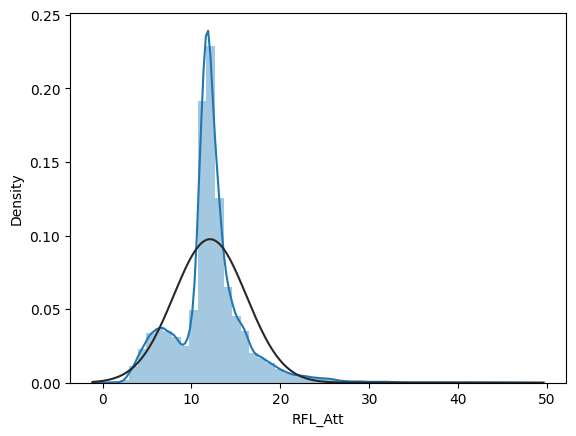

In [ ]:
from scipy.stats import norm
sns.distplot(RFL_data['RFL_Att'], fit = norm)
plt.show()

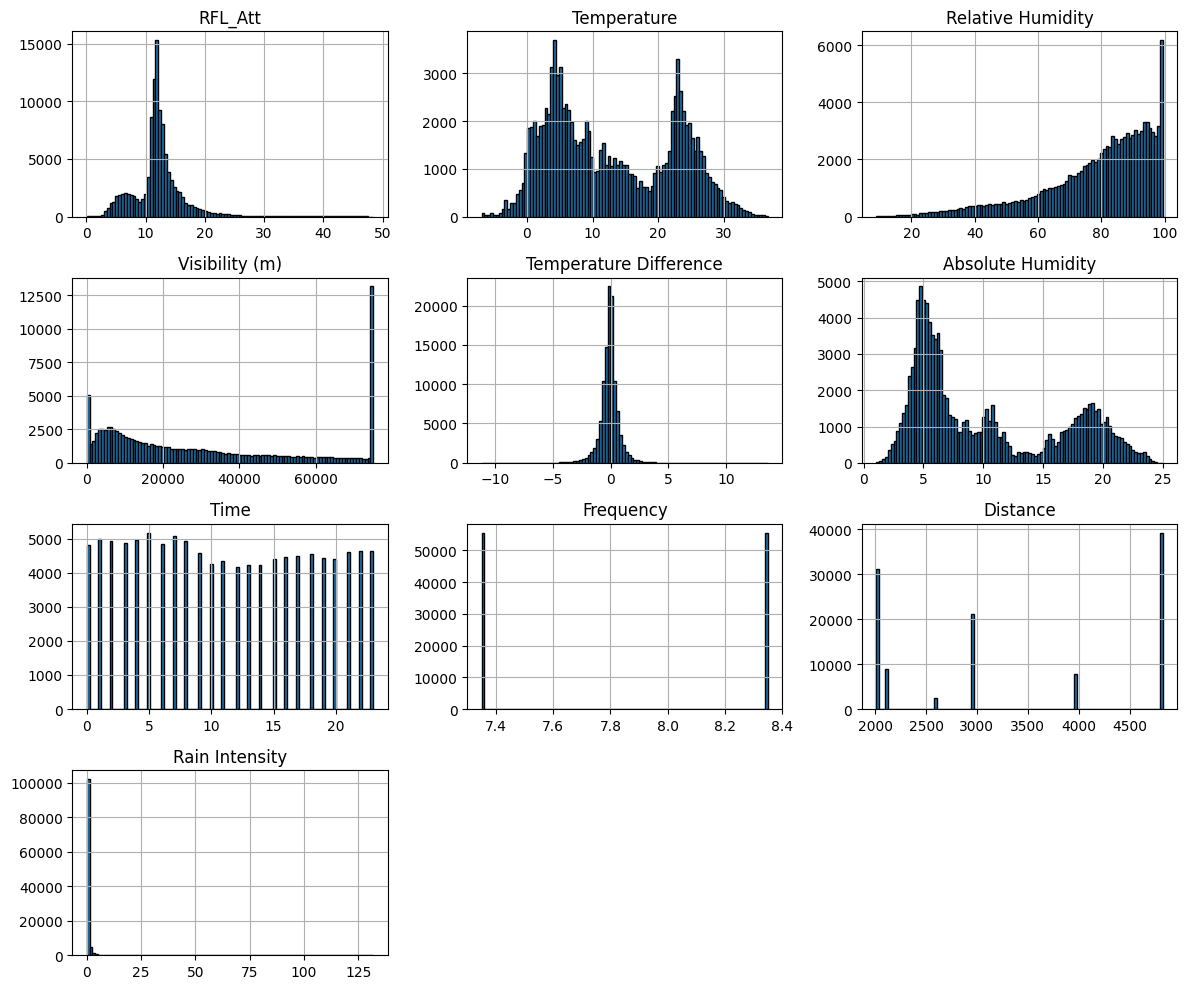

In [ ]:
features = [col for col in RFL_data.columns if ('SYNOP' not in col)]
RFL_data[features].hist(figsize=(12, 10), bins=100, edgecolor='black')
plt.tight_layout()
plt.show()


In [ ]:
RFL_data.columns

Index(['RFL_Att', 'Temperature', 'Relative Humidity', 'Visibility (m)',
       'Temperature Difference', 'Absolute Humidity', 'Time', 'Frequency',
       'Distance', 'Rain Intensity', 'SYNOP_0', 'SYNOP_3', 'SYNOP_4',
       'SYNOP_5', 'SYNOP_6', 'SYNOP_7', 'SYNOP_8'],
      dtype='object')

In [ ]:
RFL_data.head()

,RFL_Att,Temperature,Relative Humidity,Visibility (m),Temperature Difference,Absolute Humidity,Time,Frequency,Distance,Rain Intensity,SYNOP_0,SYNOP_3,SYNOP_4,SYNOP_5,SYNOP_6,SYNOP_7,SYNOP_8
0,4.941875,26.134005,71.820618,66784.84434,13.63,17.672484,9,7.35,2114.405171,0.0,1,0,0,0,0,0,0
1,4.328734,25.587852,72.885521,71044.74326,-0.54,17.470850,9,7.35,2121.637684,0.0,1,0,0,0,0,0,0
2,4.356399,25.689856,72.436011,51668.60394,-0.24,17.265145,10,7.35,2112.868600,0.0,1,0,0,0,0,0,0
3,4.340440,25.566924,70.817439,50124.79678,-0.16,16.873409,10,7.35,2115.440881,0.0,1,0,0,0,0,0,0
4,4.322831,25.628090,71.206569,58443.34520,-0.10,16.820267,10,7.35,2115.840072,0.0,1,0,0,0,0,0,0


In [ ]:
RFL_data['Temperature'].describe()

count    111040.000000
mean         12.916368
std           9.505918
min          -6.915637
25%           4.506934
50%          11.060345
75%          22.500103
max          36.734515
Name: Temperature, dtype: float64

In [ ]:
RFL_data.shape

(111040, 17)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
rfl_scaled = scaler.fit_transform(RFL_data)
rfl_scaled.shape

(111040, 17)

In [ ]:
rfl_scaled_df = pd.DataFrame(rfl_scaled, columns = RFL_data.columns)
rfl_scaled_df

,RFL_Att,Temperature,Relative Humidity,Visibility (m),Temperature Difference,Absolute Humidity,Time,Frequency,Distance,Rain Intensity,SYNOP_0,SYNOP_3,SYNOP_4,SYNOP_5,SYNOP_6,SYNOP_7,SYNOP_8
0,-1.745991,1.390470,-0.397833,1.494628,16.338866,1.221289,-0.320611,-1.001604,-1.021300,-0.163540,0.927075,-0.18381,-0.081461,-0.278264,-0.680538,-0.10884,-0.15285
1,-1.895934,1.333016,-0.337031,1.665762,-0.512715,1.188567,-0.320611,-1.001604,-1.015316,-0.163540,0.927075,-0.18381,-0.081461,-0.278264,-0.680538,-0.10884,-0.15285
2,-1.889169,1.343747,-0.362696,0.887360,-0.155942,1.155185,-0.177760,-1.001604,-1.022572,-0.163540,0.927075,-0.18381,-0.081461,-0.278264,-0.680538,-0.10884,-0.15285
3,-1.893072,1.330814,-0.455111,0.825341,-0.060803,1.091613,-0.177760,-1.001604,-1.020443,-0.163540,0.927075,-0.18381,-0.081461,-0.278264,-0.680538,-0.10884,-0.15285
4,-1.897378,1.337249,-0.432893,1.159523,0.010552,1.082989,-0.177760,-1.001604,-1.020113,-0.163540,0.927075,-0.18381,-0.081461,-0.278264,-0.680538,-0.10884,-0.15285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111035,-0.301560,1.912924,-0.738497,1.155782,0.260293,1.787613,-0.892012,-1.001604,0.512409,-0.163540,0.927075,-0.18381,-0.081461,-0.278264,-0.680538,-0.10884,-0.15285
111036,-0.267587,1.993238,-1.160364,0.233846,0.783560,1.509445,-0.606311,-1.001604,0.514906,-0.163540,0.927075,-0.18381,-0.081461,-0.278264,-0.680538,-0.10884,-0.15285
111037,-0.350780,1.967898,-0.826976,1.023323,0.248400,1.803183,-0.320611,-1.001604,0.510131,-0.163540,0.927075,-0.18381,-0.081461,-0.278264,-0.680538,-0.10884,-0.15285
111038,-0.259873,1.903467,-0.575271,0.528840,1.271150,1.962986,-0.749162,-1.001604,0.508637,-0.163540,0.927075,-0.18381,-0.081461,-0.278264,-0.680538,-0.10884,-0.15285


In [ ]:
features = [x for x in RFL_data.columns if x != 'RFL_Att']
features

['Temperature',
 'Relative Humidity',
 'Visibility (m)',
 'Temperature Difference',
 'Absolute Humidity',
 'Time',
 'Frequency',
 'Distance',
 'Rain Intensity',
 'SYNOP_0',
 'SYNOP_3',
 'SYNOP_4',
 'SYNOP_5',
 'SYNOP_6',
 'SYNOP_7',
 'SYNOP_8']

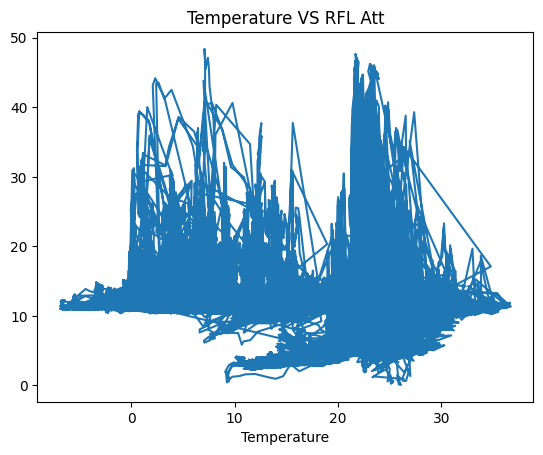

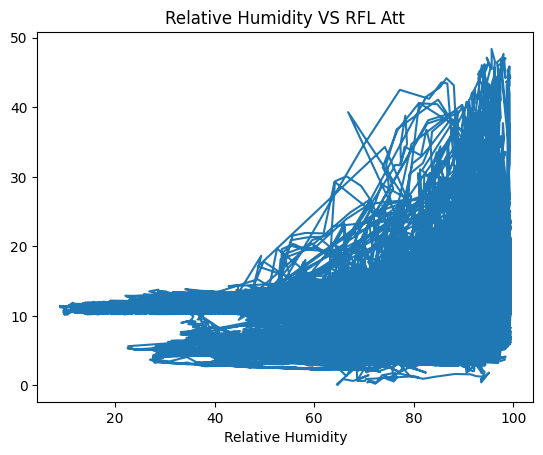

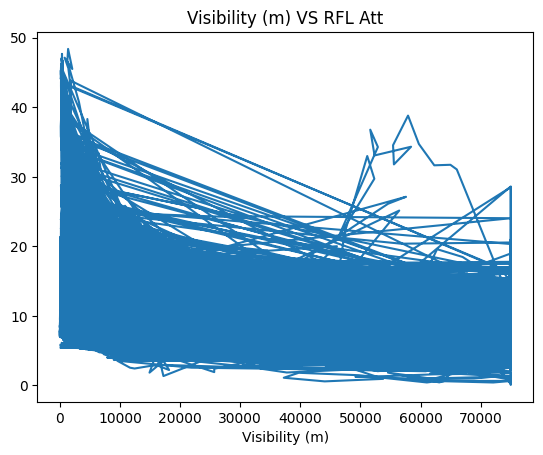

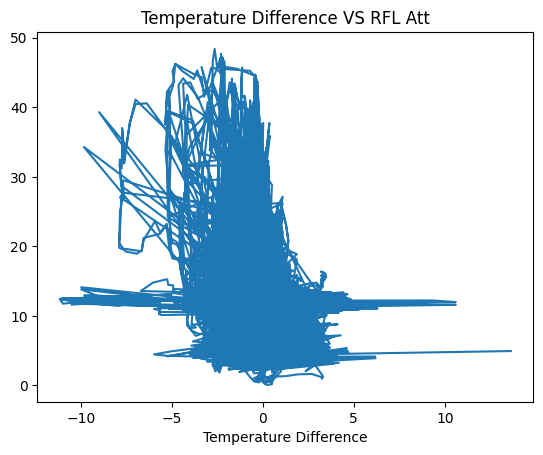

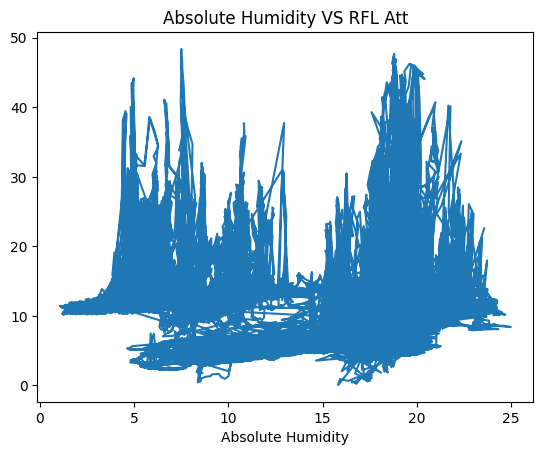

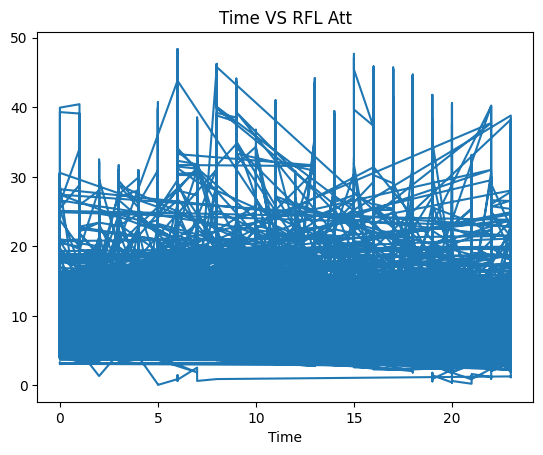

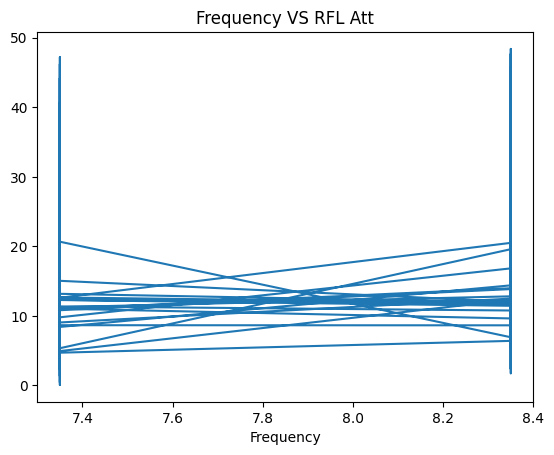

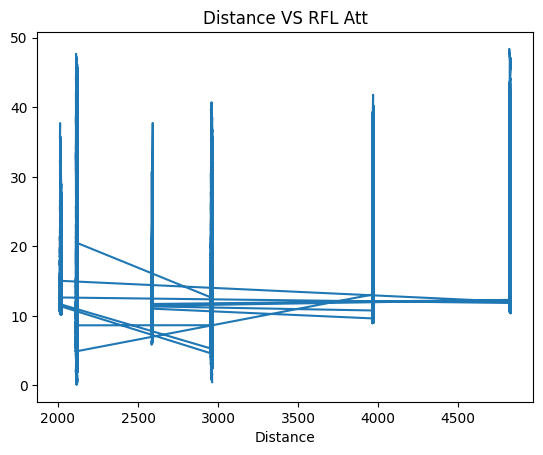

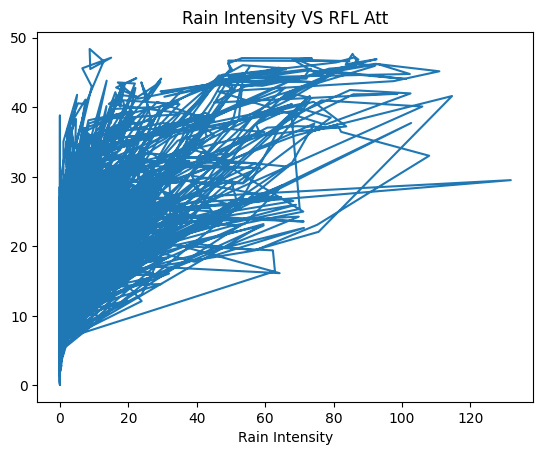

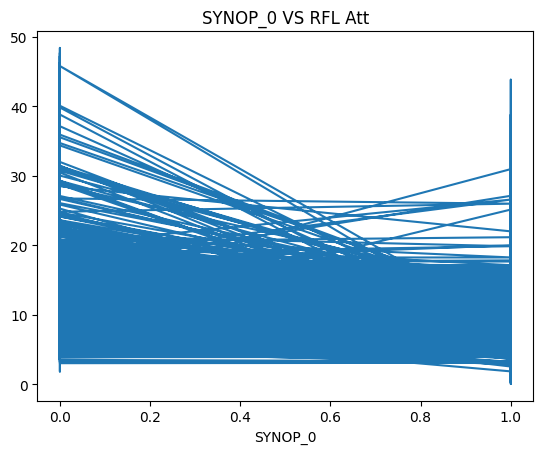

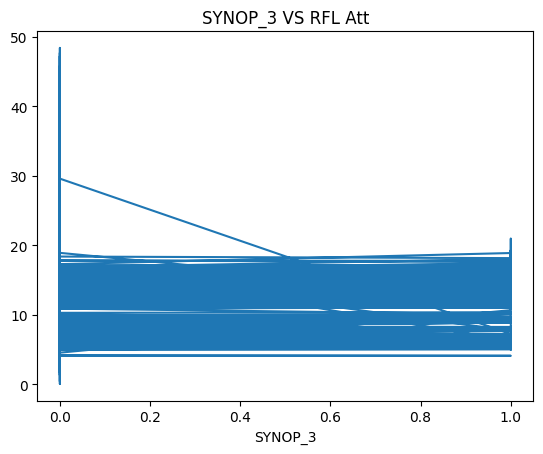

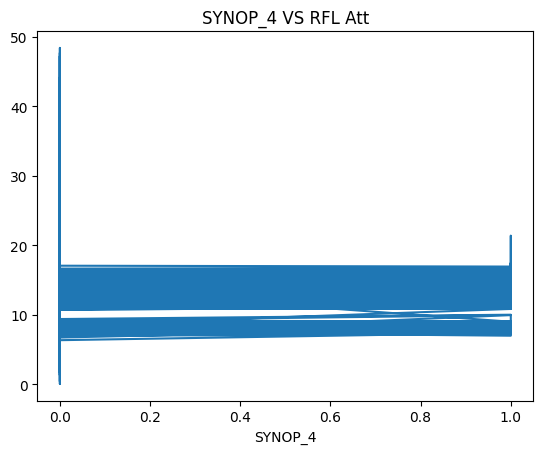

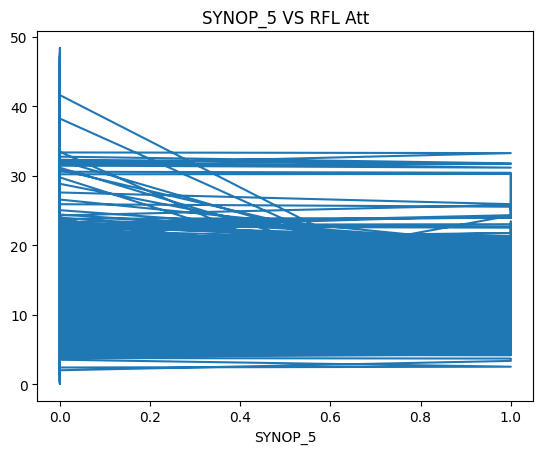

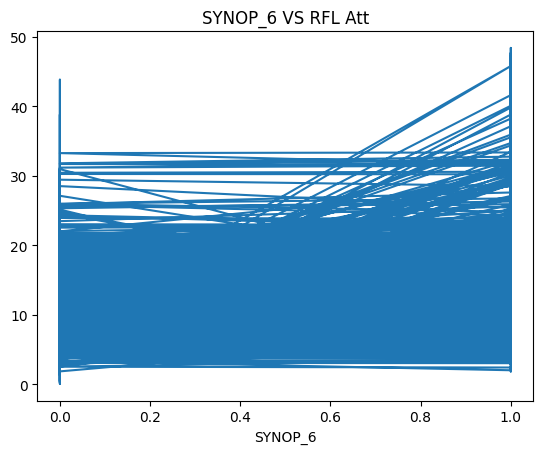

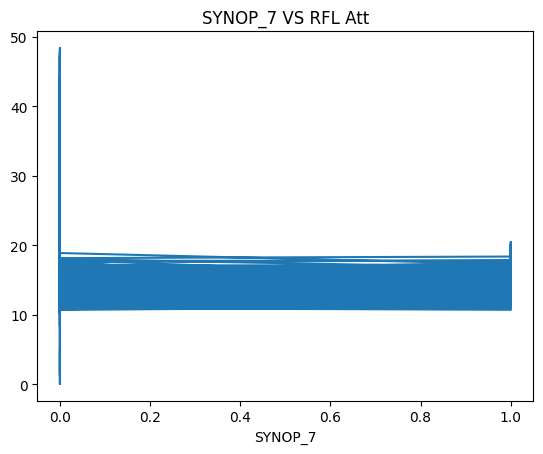

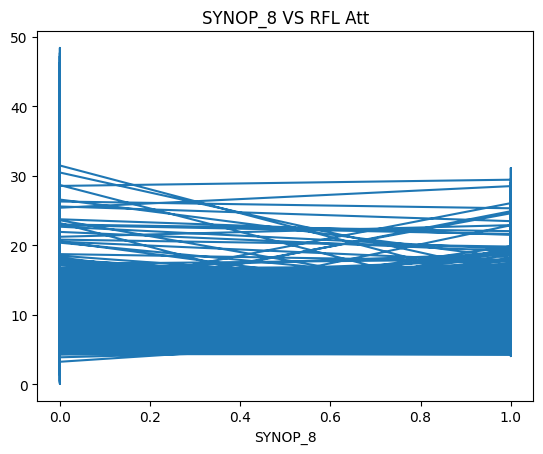

In [ ]:
def plot_relationship(x,y, title, x_label):
    plt.plot(x,y)
    plt.xlabel(x_label)
    plt.title(title)
    plt.show()

for feature in features:
    plot_relationship(RFL_data[feature] ,RFL_data['RFL_Att'], f'{feature} VS RFL Att', feature)


In [ ]:
RFL_data["Temperature"].max()

36.73451474

In [ ]:
def draw_corr(df_corr):
    corr = df_corr.corr()
    corr.style.background_gradient(cmap='coolwarm')

In [ ]:
# columns = ['Rain Intensity', 'Temperature', 'Distance', 'Visibility (m)', 'Absolute Humidity', 'SYNOP_0', 'Relative Humidity', 'Temperature Difference', 'Time', 'Frequency', 'SYNOP_8', 'SYNOP_6', 'SYNOP_5', 'SYNOP_3', 'SYNOP_7', 'SYNOP_4']
columns = ['RFL_Att','Rain Intensity', 'Temperature', 'Distance', 'Visibility (m)', 'Absolute Humidity', 'SYNOP_0', 'Relative Humidity', 'Temperature Difference', 'Time']

corr = RFL_data[columns].corr()
corr.style.background_gradient(cmap='coolwarm')

,RFL_Att,Rain Intensity,Temperature,Distance,Visibility (m),Absolute Humidity,SYNOP_0,Relative Humidity,Temperature Difference,Time
RFL_Att,1.000000,0.470993,-0.309068,0.157374,-0.377559,-0.214859,-0.451777,0.267406,-0.153935,-0.072877
Rain Intensity,0.470993,1.000000,0.088373,-0.077048,-0.167414,0.139340,-0.173627,0.125348,-0.146601,-0.003960
Temperature,-0.309068,0.088373,1.000000,-0.432239,0.019516,0.903330,0.058193,-0.145625,-0.013474,0.053491
Distance,0.157374,-0.077048,-0.432239,1.000000,0.087676,-0.297797,-0.022679,0.188202,0.021487,-0.046630
Visibility (m),-0.377559,-0.167414,0.019516,0.087676,1.000000,-0.204165,0.471994,-0.568846,0.106737,0.038614
Absolute Humidity,-0.214859,0.139340,0.903330,-0.297797,-0.204165,1.000000,-0.116490,0.243041,-0.062588,0.034356
SYNOP_0,-0.451777,-0.173627,0.058193,-0.022679,0.471994,-0.116490,1.000000,-0.502040,0.160601,0.042714
Relative Humidity,0.267406,0.125348,-0.145625,0.188202,-0.568846,0.243041,-0.502040,1.000000,-0.116209,-0.042823
Temperature Difference,-0.153935,-0.146601,-0.013474,0.021487,0.106737,-0.062588,0.160601,-0.116209,1.000000,-0.095216
Time,-0.072877,-0.003960,0.053491,-0.046630,0.038614,0.034356,0.042714,-0.042823,-0.095216,1.000000


In [ ]:
corr = RFL_data.corr()
corr.style.background_gradient(cmap='coolwarm')

,RFL_Att,Temperature,Relative Humidity,Visibility (m),Temperature Difference,Absolute Humidity,Time,Frequency,Distance,Rain Intensity,SYNOP_0,SYNOP_3,SYNOP_4,SYNOP_5,SYNOP_6,SYNOP_7,SYNOP_8
RFL_Att,1.000000,-0.309068,0.267406,-0.377559,-0.153935,-0.214859,-0.072877,0.005668,0.157374,0.470993,-0.451777,0.087404,0.015809,-0.031087,0.452468,0.036407,0.013934
Temperature,-0.309068,1.000000,-0.145625,0.019516,-0.013474,0.903330,0.053491,-0.000758,-0.432239,0.088373,0.058193,-0.209304,-0.091190,0.000179,0.048624,-0.150820,0.061205
Relative Humidity,0.267406,-0.145625,1.000000,-0.568846,-0.116209,0.243041,-0.042823,0.001528,0.188202,0.125348,-0.502040,0.206854,0.055292,0.130162,0.339836,0.092957,0.049326
Visibility (m),-0.377559,0.019516,-0.568846,1.000000,0.106737,-0.204165,0.038614,-0.001727,0.087676,-0.167414,0.471994,-0.212417,-0.046787,-0.051926,-0.346137,-0.107303,-0.052342
Temperature Difference,-0.153935,-0.013474,-0.116209,0.106737,1.000000,-0.062588,-0.095216,0.001839,0.021487,-0.146601,0.160601,-0.009201,0.003187,-0.020979,-0.139557,-0.005289,-0.052187
Absolute Humidity,-0.214859,0.903330,0.243041,-0.204165,-0.062588,1.000000,0.034356,-0.000417,-0.297797,0.139340,-0.116490,-0.128891,-0.062567,0.046002,0.155903,-0.099925,0.083105
Time,-0.072877,0.053491,-0.042823,0.038614,-0.095216,0.034356,1.000000,-0.000329,-0.046630,-0.003960,0.042714,-0.063439,-0.015800,-0.002138,-0.019061,-0.050874,0.041193
Frequency,0.005668,-0.000758,0.001528,-0.001727,0.001839,-0.000417,-0.000329,1.000000,0.002248,0.001874,-0.003246,-0.000143,0.000315,0.000182,0.003711,-0.000007,-0.001029
Distance,0.157374,-0.432239,0.188202,0.087676,0.021487,-0.297797,-0.046630,0.002248,1.000000,-0.077048,-0.022679,0.137760,0.064168,-0.000920,-0.064378,0.128694,-0.013671
Rain Intensity,0.470993,0.088373,0.125348,-0.167414,-0.146601,0.139340,-0.003960,0.001874,-0.077048,1.000000,-0.173627,-0.030055,-0.010422,-0.038543,0.225120,-0.008342,-0.007394


In [ ]:
# correlation matrix plot
# relation between input variables to target
import matplotlib.pyplot as plt

def plot_relationship_with_features(number_of_rows, number_of_columns, data_df, target_column_name):
    fig, axs = plt.subplots(number_of_rows, number_of_columns, sharex=True)

    y = data_df[target_column_name]
    features = [x for x in data_df.columns if x != target_column_name]

    i = 0
    for row in range(number_of_rows):
        for column in range(number_of_columns):
            feature_to_plot = features[i]
            axs[row, column].plot(data_df[feature_to_plot], y)
            axs[row, column].set_title(f'{target_column_name} VS {feature_to_plot}')
            i += 1

    for ax in axs.flat:
        ax.set(xlabel='Feature', ylabel= target_column_name)

    # Hide x-labels and tick labels for top plots and y ticks for right plots
    for ax in axs.flat:
        ax.label_outer()

    plt.show()


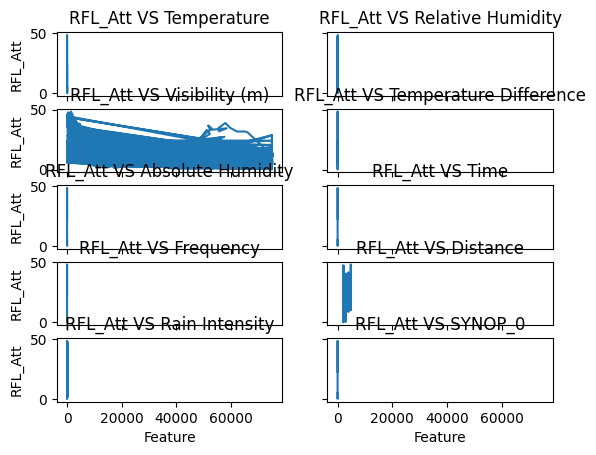

In [ ]:
plot_relationship_with_features(5,2, RFL_data, 'RFL_Att')

# 4 - Split the data

In [ ]:
#
# y = RFL_data['RFL_Att']
# X = RFL_data.drop(columns=['RFL_Att'])

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=23)

# print("Training DataFrame:")
# display(train_data)

# print("\nTesting DataFrame:")
# display(test_data)


In [ ]:
# X.shape

(111040, 16)

In [ ]:
# y.head()

0    4.941875
1    4.328734
2    4.356399
3    4.340440
4    4.322831
Name: RFL_Att, dtype: float64

In [ ]:
# y.isna().sum()

0

In [ ]:
# RFL_data.isna().sum()

RFL_Att                   0
Temperature               0
Relative Humidity         0
Visibility (m)            0
Temperature Difference    0
Absolute Humidity         0
Time                      0
Frequency                 0
Distance                  0
Rain Intensity            0
SYNOP_0                   0
SYNOP_3                   0
SYNOP_4                   0
SYNOP_5                   0
SYNOP_6                   0
SYNOP_7                   0
SYNOP_8                   0
dtype: int64

In [ ]:
# regr = RandomForestRegressor(max_depth=2, random_state=0)
# regr.fit(X_train, y_train)

# pred = regr.predict(X_test)

# rmse = mean_squared_error(y_test, pred , squared=False)
# print('RMSE ', rmse)

# r2 = r2_score(y_test, pred)
# print('R2 ', r2)


In [ ]:
# param_grid = {
#     'n_estimators': [5, 10, 15, 20],
#     'max_depth': [2, 5, 7, 9]
# }

# param_grid = {
#     'n_estimators': [5,10],
#     'max_depth': [2, 5]
# }

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html


https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html






In [ ]:
# # cv=10
# grid_regr = GridSearchCV(regr, param_grid, cv=3)
# grid_regr.fit(X_train, y_train)

In [ ]:
# estimator = grid_regr.best_estimator_
# estimator

In [ ]:
# grid_regr.best_score_

In [ ]:
# grid_regr.best_params_

In [ ]:
# param_grid = {
#     'n_estimators': [5,10],
#     'max_depth': [2, 5]
# }

In [ ]:
# y_pred = estimator.predict(X_test)

# rmse = mean_squared_error(y_test, y_pred , squared=False)
# print('RMSE ', rmse)

# r2 = r2_score(y_test, y_pred)
# print('R2 ', r2)

In [ ]:
def perform_random_forest_regression(X, y, param_grid, cv, plot=False):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)
    y_train = y_train.to_numpy().reshape(-1,1)
    y_test = y_test.to_numpy().reshape(-1,1)
    feature_scaler = StandardScaler().fit(X_train)
    target_scaler = StandardScaler().fit(y_train)
    X_train = feature_scaler.transform(X_train)
    X_test = feature_scaler.transform(X_test)
    y_train = target_scaler.transform(y_train)

    regressor = RandomForestRegressor(random_state=0, oob_score=True, n_jobs=4)
    grid_regr = GridSearchCV(estimator = regressor, param_grid = param_grid, cv = cv)
    grid_regr.fit(X_train, y_train)

    model = grid_regr.best_estimator_
    best_params = grid_regr.best_params_

    # estimator.feature_importances_
    y_pred = model.predict(X_test).reshape(-1,1)
    # inverse transform
    y_pred = target_scaler.inverse_transform(y_pred)

    rmse = mean_squared_error(y_test, y_pred , squared=False)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    feature_importances = list(zip(X.columns, model.feature_importances_))
    feature_importances.sort(key = lambda x : x[1])

    df_features = pd.DataFrame(feature_importances, columns=["feature","importance"])

    features_sorted_by_importance = list(df_features.sort_values(by=["importance"], ascending=False)["feature"])
    print('Features count, ', len(features_sorted_by_importance) ,' features_sorted_by_importance ', features_sorted_by_importance)

    least_important_feature = None
    if len(df_features) >= 1:
       least_important_feature = df_features.sort_values(by=["importance"], ascending=True)['feature'][0]

    if plot:
        plt.barh([x[0] for x in feature_importances],[x[1] for x in feature_importances])
        plt.show()

    return {"best_params ": best_params,
            "rmse": rmse,
            "mse": mse,
            "mae": mae,
            "r2" : r2,
            "feature_importances": model.feature_importances_,
            "features": list(X.columns),
            "number_of_features": len(X.columns),
            "least_important_feature": least_important_feature,
            "feature_importance_df": df_features}

def process_data(process_df, target_column_name):
    # Remove unncessary columns
    process_df = process_df.iloc[:, :11]

    # Remove negative value in target columns (RFL_Att, FSO_Att ) column
    process_df[target_column_name] = process_df[target_column_name].apply(lambda x: x if x >= 0 else None)

    # Encode SYNOP Code column
    process_df = pd.concat([process_df, pd.get_dummies(process_df["SYNOP Code"], prefix="SYNOP")], axis=1)
    process_df.drop("SYNOP Code", axis = 1, inplace = True)

    process_df = process_df.dropna()

    return process_df


def preprocess_rfl_data(RFL_data):
    RFL_data['Frequency'] = RFL_data['Frequency'] / 10000000000
    return RFL_data

# def preprocess_fso_data(FSO_data):
#     return FSO_data

def peform_random_forest_regression_with_removing_least_important_features(file_path, data_type, target_column_name, param_grid, cv):
    data_df = pd.read_csv(file_path)
    data_df = process_data(data_df, target_column_name)

    if data_type == "RFL":
        data_df = preprocess_rfl_data(data_df)

    y = data_df[target_column_name]
    X = data_df.drop(columns=[target_column_name])

    features = list(X.columns)
    results = []
    while len(features) >= 1:
        print('\nRandom Forest len(features) ', len(features))
        result = perform_random_forest_regression(X, y, param_grid, cv)
        results.append(result)

        # features = result['features']
        if result['least_important_feature']:
            X = X.drop(columns=[result['least_important_feature']])

        features = list(X.columns)

    return results



In [ ]:
file_path = '/content/drive/MyDrive/DS Capstone/Dataset/RFLData.csv'

param_grid = {
    # 'n_estimators': [10],
    # 'max_depth': [20]
}

results = peform_random_forest_regression_with_removing_least_important_features(file_path, 'RFL', 'RFL_Att', param_grid, 3)
results_df = pd.DataFrame(results)
results_df.sort_values(by=["rmse"], ascending=True)


Random Forest len(features)  16
Features count,  16  features_sorted_by_importance  ['Rain Intensity', 'Temperature', 'Distance', 'Visibility (m)', 'Absolute Humidity', 'SYNOP_0', 'Relative Humidity', 'Temperature Difference', 'Time', 'Frequency', 'SYNOP_8', 'SYNOP_6', 'SYNOP_5', 'SYNOP_3', 'SYNOP_7', 'SYNOP_4']

Random Forest len(features)  15
Features count,  15  features_sorted_by_importance  ['Rain Intensity', 'Temperature', 'Distance', 'Visibility (m)', 'Absolute Humidity', 'SYNOP_0', 'Relative Humidity', 'Temperature Difference', 'Time', 'Frequency', 'SYNOP_8', 'SYNOP_6', 'SYNOP_5', 'SYNOP_3', 'SYNOP_7']

Random Forest len(features)  14
Features count,  14  features_sorted_by_importance  ['Rain Intensity', 'Temperature', 'Distance', 'Visibility (m)', 'Absolute Humidity', 'SYNOP_0', 'Relative Humidity', 'Temperature Difference', 'Time', 'Frequency', 'SYNOP_8', 'SYNOP_6', 'SYNOP_5', 'SYNOP_3']

Random Forest len(features)  13
Features count,  13  features_sorted_by_importance  ['R

,best_params,rmse,mse,mae,r2,feature_importances,features,number_of_features,least_important_feature,feature_importance_df
2,{},0.692499,0.479555,0.345362,0.971709,"[0.1882549607899219, 0.0237661450173453, 0.062...","[Temperature, Relative Humidity, Visibility (m...",14,SYNOP_3,feature importance 0 ...
3,{},0.693124,0.480421,0.345364,0.971658,"[0.18842682167520797, 0.023786853492586038, 0....","[Temperature, Relative Humidity, Visibility (m...",13,SYNOP_5,feature importance 0 ...
0,{},0.693508,0.480953,0.345366,0.971626,"[0.18810329998879935, 0.023794824949921845, 0....","[Temperature, Relative Humidity, Visibility (m...",16,SYNOP_4,feature importance 0 ...
1,{},0.693722,0.481250,0.345381,0.971609,"[0.18838391057632686, 0.02374021634995529, 0.0...","[Temperature, Relative Humidity, Visibility (m...",15,SYNOP_7,feature importance 0 ...
5,{},0.693982,0.481611,0.345973,0.971587,"[0.18847564807467823, 0.023787604315359617, 0....","[Temperature, Relative Humidity, Visibility (m...",11,SYNOP_8,feature importance 0 ...
4,{},0.694328,0.482092,0.345684,0.971559,"[0.18824214586094606, 0.023816832937701527, 0....","[Temperature, Relative Humidity, Visibility (m...",12,SYNOP_6,feature importance 0 ...
6,{},0.696954,0.485744,0.346117,0.971344,"[0.18847238478596656, 0.023844788429656445, 0....","[Temperature, Relative Humidity, Visibility (m...",10,Frequency,feature importance 0 ...
7,{},0.870437,0.757661,0.510138,0.955302,"[0.19026817298651583, 0.024987286142079953, 0....","[Temperature, Relative Humidity, Visibility (m...",9,Time,feature importance 0 ...
8,{},0.930327,0.865509,0.541045,0.948939,"[0.19258189339103554, 0.02726951757179398, 0.0...","[Temperature, Relative Humidity, Visibility (m...",8,Temperature Difference,feature importance 0 Tempe...
9,{},1.020924,1.042285,0.580509,0.938511,"[0.1967199738379479, 0.03026651760140316, 0.07...","[Temperature, Relative Humidity, Visibility (m...",7,Relative Humidity,feature importance 0 Relative H...


In [ ]:
results_df['feature_importance_df'][0].sort_values(by=["importance"], ascending=False)

,feature,importance
15,Rain Intensity,0.429092
14,Temperature,0.188103
13,Distance,0.151147
12,Visibility (m),0.062946
11,Absolute Humidity,0.060798
10,SYNOP_0,0.041657
9,Relative Humidity,0.023795
8,Temperature Difference,0.016328
7,Time,0.013172
6,Frequency,0.011498


In [ ]:
rfl_sorted_by_num_features = results_df.sort_values(by=["number_of_features"], ascending=True)
rfl_sorted_by_num_features

,best_params,rmse,mse,mae,r2,feature_importances,features,number_of_features,least_important_feature,feature_importance_df
15,{},3.324145,11.049942,2.434228,0.348110,[1.0],[Rain Intensity],1,Rain Intensity,feature importance 0 Rain Intensit...
14,{},2.567424,6.591664,1.638548,0.611126,"[0.4705181947871134, 0.5294818052128866]","[Temperature, Rain Intensity]",2,Temperature,feature importance 0 Temperatur...
13,{},1.648089,2.716199,0.991228,0.839758,"[0.2712574410077538, 0.21710060652329788, 0.51...","[Temperature, Distance, Rain Intensity]",3,Distance,feature importance 0 Distanc...
12,{},1.252178,1.567951,0.732320,0.907499,"[0.2409080033228416, 0.1079978229908431, 0.180...","[Temperature, Visibility (m), Distance, Rain I...",4,Visibility (m),feature importance 0 Visibility (m...
11,{},1.059107,1.121707,0.595036,0.933825,"[0.20707401079570378, 0.09053629347727828, 0.0...","[Temperature, Visibility (m), Absolute Humidit...",5,Absolute Humidity,feature importance 0 Absolute H...
10,{},1.055107,1.113251,0.593446,0.934324,"[0.2069144894224652, 0.0779613588180417, 0.077...","[Temperature, Visibility (m), Absolute Humidit...",6,SYNOP_0,feature importance 0 ...
9,{},1.018922,1.038202,0.580204,0.938751,"[0.1966517305193815, 0.03025801931838969, 0.07...","[Temperature, Relative Humidity, Visibility (m...",7,Relative Humidity,feature importance 0 Relative H...
8,{},0.929703,0.864348,0.540512,0.949008,"[0.1927202866436617, 0.027220853271000725, 0.0...","[Temperature, Relative Humidity, Visibility (m...",8,Temperature Difference,feature importance 0 Tempe...
7,{},0.870490,0.757753,0.509837,0.955296,"[0.19049976173749103, 0.024955396194878368, 0....","[Temperature, Relative Humidity, Visibility (m...",9,Time,feature importance 0 ...
6,{},0.694411,0.482206,0.345986,0.971552,"[0.18842286735509817, 0.0238497612508494, 0.06...","[Temperature, Relative Humidity, Visibility (m...",10,Frequency,feature importance 0 ...


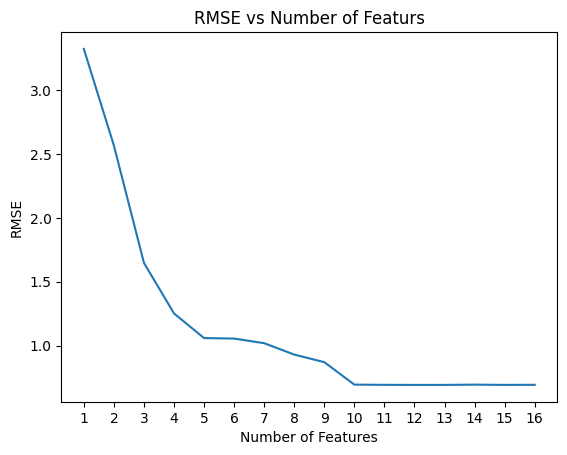

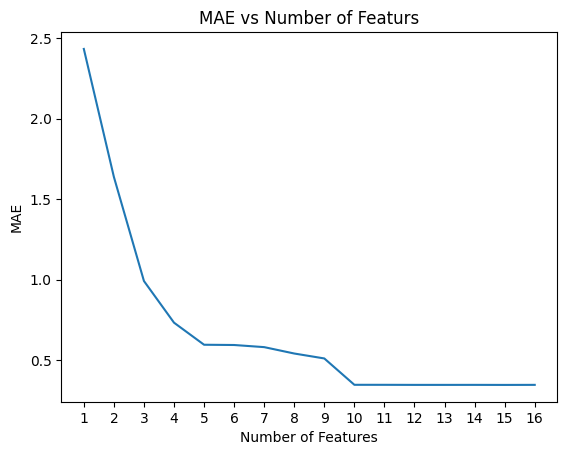

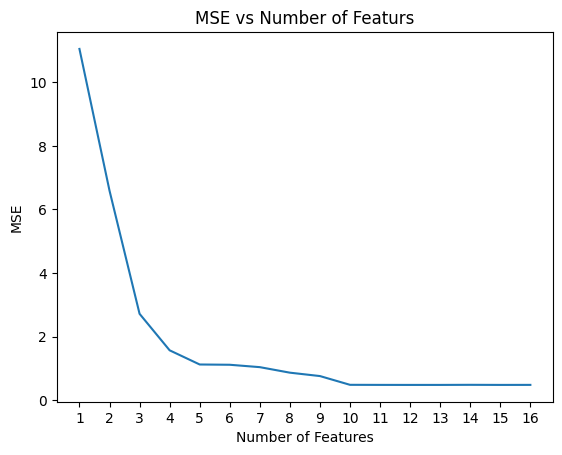

In [ ]:
import matplotlib.pyplot as plt
def plot_error_plot(rmse_list, title, y_label):
    x = range(1,17)
    plt.plot(x, rmse_list)
    plt.xticks(x)
    plt.xlabel('Number of Features')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

plot_error_plot(rfl_sorted_by_num_features['rmse'], 'RMSE vs Number of Featurs', 'RMSE')
plot_error_plot(rfl_sorted_by_num_features['mae'], 'MAE vs Number of Featurs', 'MAE')
plot_error_plot(rfl_sorted_by_num_features['mse'], 'MSE vs Number of Featurs', 'MSE')


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_heatmap(data, x_labels, y_labels, title, cmap='viridis'):
    plt.figure(figsize=(8, 6))
    plt.imshow(data, cmap=cmap, interpolation='nearest')

    plt.colorbar(label='Value')

    plt.xticks(np.arange(len(x_labels)), x_labels, rotation=45)
    plt.yticks(np.arange(len(y_labels)), y_labels)

    plt.xlabel('X Label')
    plt.ylabel('Y Label')
    plt.title(title)

    plt.tight_layout()
    plt.show()


In [ ]:
plot_heatmap(data, x_labels, y_labels, title, cmap='viridis')

In [ ]:
file_path_fso = '/content/drive/MyDrive/DS Capstone/Dataset/FSOData.csv'

param_grid_fso = {
    # 'n_estimators': [10],`
    # 'max_depth': [2]
}

results_fso = peform_random_forest_regression_with_removing_least_important_features(file_path_fso, 'FSO', 'FSO_Att', param_grid_fso, 3)
results_fso_df = pd.DataFrame(results_fso)
results_fso_df.sort_values(by=["rmse"], ascending=True)


Random Forest len(features)  16
Features count,  16  features_sorted_by_importance  ['Distance', 'Visibility', 'Temperature', 'Particulate', 'Absolute Humidity', 'Time', 'Temperature Difference', 'Wind Speed Max', 'Wind Speed', 'SYNOP_3', 'SYNOP_0', 'SYNOP_5', 'SYNOP_6', 'SYNOP_8', 'SYNOP_7', 'SYNOP_4']

Random Forest len(features)  15
Features count,  15  features_sorted_by_importance  ['Distance', 'Visibility', 'Temperature', 'Particulate', 'Absolute Humidity', 'Time', 'Temperature Difference', 'Wind Speed Max', 'Wind Speed', 'SYNOP_3', 'SYNOP_0', 'SYNOP_5', 'SYNOP_6', 'SYNOP_8', 'SYNOP_7']

Random Forest len(features)  14
Features count,  14  features_sorted_by_importance  ['Distance', 'Visibility', 'Temperature', 'Particulate', 'Absolute Humidity', 'Time', 'Temperature Difference', 'Wind Speed Max', 'Wind Speed', 'SYNOP_3', 'SYNOP_0', 'SYNOP_5', 'SYNOP_6', 'SYNOP_8']

Random Forest len(features)  13
Features count,  13  features_sorted_by_importance  ['Distance', 'Visibility', 'Te

,best_params,rmse,mse,mae,r2,feature_importances,features,number_of_features,least_important_feature,feature_importance_df
8,{},0.811456,0.658462,0.442814,0.956948,"[0.050863052711192916, 0.2421251232266533, 0.0...","[Absolute Humidity, Visibility, Time, Wind Spe...",8,Wind Speed Max,feature importance 0 ...
7,{},0.812203,0.659674,0.439556,0.956869,"[0.049123756574038925, 0.012002489045197328, 0...","[Absolute Humidity, Wind Speed, Visibility, Ti...",9,Wind Speed,feature importance 0 ...
1,{},0.813250,0.661376,0.438444,0.956757,"[0.04835906338239594, 0.011824969993138958, 0....","[Absolute Humidity, Wind Speed, Visibility, Ti...",15,SYNOP_7,feature importance 0 ...
0,{},0.813326,0.661499,0.438427,0.956749,"[0.04852659526770089, 0.011889285184980898, 0....","[Absolute Humidity, Wind Speed, Visibility, Ti...",16,SYNOP_4,feature importance 0 ...
3,{},0.813457,0.661712,0.438771,0.956735,"[0.048580850683178994, 0.0118780499567446, 0.2...","[Absolute Humidity, Wind Speed, Visibility, Ti...",13,SYNOP_6,feature importance 0 ...
4,{},0.814215,0.662946,0.439212,0.956655,"[0.048553663312141955, 0.011916448320598037, 0...","[Absolute Humidity, Wind Speed, Visibility, Ti...",12,SYNOP_5,feature importance 0 ...
6,{},0.815010,0.664241,0.440927,0.956570,"[0.049222557633979, 0.011992775955952063, 0.23...","[Absolute Humidity, Wind Speed, Visibility, Ti...",10,SYNOP_3,feature importance 0 ...
2,{},0.815359,0.664811,0.439067,0.956533,"[0.04851841423641265, 0.01183744999469918, 0.2...","[Absolute Humidity, Wind Speed, Visibility, Ti...",14,SYNOP_8,feature importance 0 ...
9,{},0.816809,0.667176,0.450470,0.956378,"[0.05396005398115279, 0.24549306626951498, 0.0...","[Absolute Humidity, Visibility, Time, Temperat...",7,Temperature Difference,feature importance 0 Tempe...
5,{},0.817233,0.667871,0.440514,0.956333,"[0.048923557786649245, 0.011878871963243592, 0...","[Absolute Humidity, Wind Speed, Visibility, Ti...",11,SYNOP_0,feature importance 0 ...


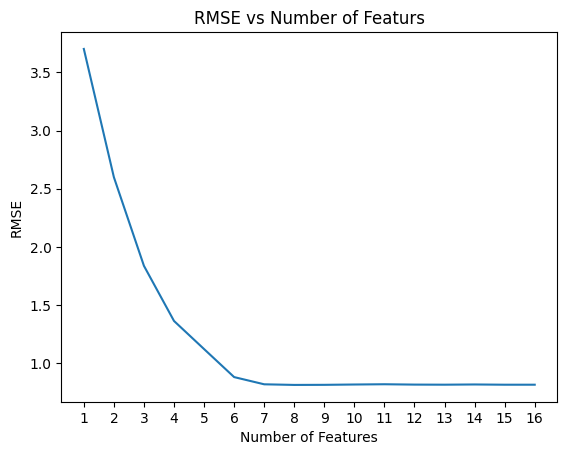

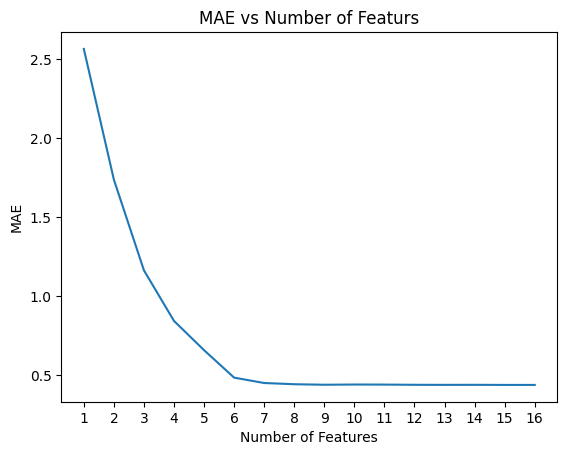

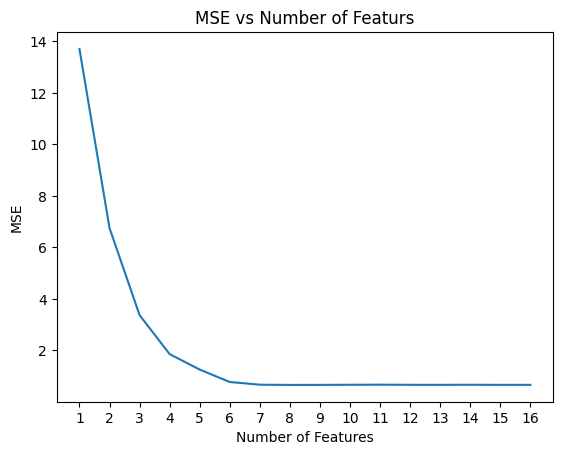

In [ ]:
fso_sorted_by_num_features = results_fso_df.sort_values(by=["number_of_features"], ascending=True)
# fso_sorted_by_num_features
plot_error_plot(fso_sorted_by_num_features['rmse'], 'RMSE vs Number of Featurs', 'RMSE')
plot_error_plot(fso_sorted_by_num_features['mae'], 'MAE vs Number of Featurs', 'MAE')
plot_error_plot(fso_sorted_by_num_features['mse'], 'MSE vs Number of Featurs', 'MSE')

In [ ]:
file_path_rfl = '/content/drive/MyDrive/DS Capstone/Dataset/RFLData.csv'

param_grid_rfl = {
    'n_estimators': [10],
    'max_depth': [2]
}

results_rfl = peform_random_forest_regression_with_removing_least_important_features(file_path_rfl, 'RFL', 'RFL_Att', param_grid_rfl, 3)
results_df_rfl = pd.DataFrame(results_rfl)
results_df_rfl.sort_values(by=["rmse"], ascending=True)


Random Forest len(features)  16
Features count,  16  features_sorted_by_importance  ['Rain Intensity', 'Temperature', 'Relative Humidity', 'Visibility (m)', 'Temperature Difference', 'Absolute Humidity', 'Time', 'Frequency', 'Distance', 'SYNOP_0', 'SYNOP_3', 'SYNOP_4', 'SYNOP_5', 'SYNOP_6', 'SYNOP_7', 'SYNOP_8']

Random Forest len(features)  15
Features count,  15  features_sorted_by_importance  ['Rain Intensity', 'Temperature', 'Visibility (m)', 'Temperature Difference', 'Absolute Humidity', 'Time', 'Frequency', 'Distance', 'SYNOP_0', 'SYNOP_3', 'SYNOP_4', 'SYNOP_5', 'SYNOP_6', 'SYNOP_7', 'SYNOP_8']

Random Forest len(features)  14
Features count,  14  features_sorted_by_importance  ['Rain Intensity', 'Temperature', 'Temperature Difference', 'Absolute Humidity', 'Time', 'Frequency', 'Distance', 'SYNOP_0', 'SYNOP_3', 'SYNOP_4', 'SYNOP_5', 'SYNOP_6', 'SYNOP_7', 'SYNOP_8']

Random Forest len(features)  13
Features count,  13  features_sorted_by_importance  ['Rain Intensity', 'Temperatur

,best_params,rmse,mse,mae,r2,feature_importances,features,number_of_features,least_important_feature,feature_importance_df
0,"{'max_depth': 2, 'n_estimators': 10}",2.879778,8.293124,2.009253,0.510748,"[0.25409882196901584, 0.0, 0.0, 0.0, 0.0, 0.0,...","[Temperature, Relative Humidity, Visibility (m...",16,Relative Humidity,feature importance 0 ...
2,"{'max_depth': 2, 'n_estimators': 10}",2.879778,8.293124,2.009253,0.510748,"[0.254098821969026, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","[Temperature, Temperature Difference, Absolute...",14,Temperature Difference,feature importance 0 Tem...
1,"{'max_depth': 2, 'n_estimators': 10}",2.879778,8.293124,2.009253,0.510748,"[0.25409882196903427, 0.0, 0.0, 0.0, 0.0, 0.0,...","[Temperature, Visibility (m), Temperature Diff...",15,Visibility (m),feature importance 0 ...
3,"{'max_depth': 2, 'n_estimators': 10}",2.879778,8.293124,2.009253,0.510748,"[0.25409882196903805, 0.0, 0.0, 0.0, 0.0, 0.74...","[Temperature, Absolute Humidity, Time, Frequen...",13,Absolute Humidity,feature importance 0 Absolute...
4,"{'max_depth': 2, 'n_estimators': 10}",2.879778,8.293124,2.009253,0.510748,"[0.2540988219690466, 0.0, 0.0, 0.0, 0.74590117...","[Temperature, Time, Frequency, Distance, Rain ...",12,Time,feature importance 0 T...
5,"{'max_depth': 2, 'n_estimators': 10}",2.879778,8.293124,2.009253,0.510748,"[0.25409882196909833, 0.0, 0.0, 0.745901178030...","[Temperature, Frequency, Distance, Rain Intens...",11,Frequency,feature importance 0 Freque...
6,"{'max_depth': 2, 'n_estimators': 10}",2.879778,8.293124,2.009253,0.510748,"[0.25409882196909195, 0.0, 0.745901178030908, ...","[Temperature, Distance, Rain Intensity, SYNOP_...",10,Distance,feature importance 0 Distanc...
7,"{'max_depth': 2, 'n_estimators': 10}",2.879778,8.293124,2.009253,0.510748,"[0.2540988219690729, 0.7459011780309271, 0.0, ...","[Temperature, Rain Intensity, SYNOP_0, SYNOP_3...",9,SYNOP_0,feature importance 0 SYNOP_...
8,"{'max_depth': 2, 'n_estimators': 10}",2.879778,8.293124,2.009253,0.510748,"[0.25409882196907696, 0.745901178030923, 0.0, ...","[Temperature, Rain Intensity, SYNOP_3, SYNOP_4...",8,SYNOP_3,feature importance 0 SYNOP_...
9,"{'max_depth': 2, 'n_estimators': 10}",2.879778,8.293124,2.009253,0.510748,"[0.2540988219691037, 0.7459011780308963, 0.0, ...","[Temperature, Rain Intensity, SYNOP_4, SYNOP_5...",7,SYNOP_4,feature importance 0 SYNOP_...


In [ ]:
results_df_rfl['feature_importance_df']

NameError: ignored

In [ ]:
results_df.sort_values(by=["number_of_features"], ascending=True)

,best_params,max_depth,n_estimators,rmse,r2,feature_importances,features,number_of_features,least_important_feature,feature_importance_df
15,"{'max_depth': 5, 'n_estimators': 5}",5,5,3.030750,0.459745,[1.0],[Rain Intensity],1,Rain Intensity,feature importance 0 Rain Intensit...
14,"{'max_depth': 5, 'n_estimators': 5}",5,5,2.367392,0.670361,"[0.3088781489292558, 0.6911218510707442]","[Temperature, Rain Intensity]",2,Temperature,feature importance 0 Temperatur...
13,"{'max_depth': 5, 'n_estimators': 5}",5,5,1.930427,0.780818,"[0.22096180133920834, 0.17954401726396182, 0.5...","[Temperature, Distance, Rain Intensity]",3,Distance,feature importance 0 Distanc...
12,"{'max_depth': 5, 'n_estimators': 5}",5,5,1.910829,0.785246,"[0.2249796308672502, 0.15926422495122466, 0.56...","[Temperature, Distance, Rain Intensity, SYNOP_0]",4,SYNOP_0,feature importance 0 SYNOP_...
11,"{'max_depth': 5, 'n_estimators': 5}",5,5,1.837171,0.801483,"[0.21958397151241787, 0.050978441813187586, 0....","[Temperature, Visibility (m), Distance, Rain I...",5,Visibility (m),feature importance 0 Visibility (m...
10,"{'max_depth': 5, 'n_estimators': 5}",5,5,1.853335,0.797974,"[0.21491423464079737, 0.050338732070529704, 0....","[Temperature, Visibility (m), Absolute Humidit...",6,Absolute Humidity,feature importance 0 Absolute H...
9,"{'max_depth': 5, 'n_estimators': 5}",5,5,1.836685,0.801588,"[0.21398353059465594, 0.008971021828044243, 0....","[Temperature, Relative Humidity, Visibility (m...",7,Relative Humidity,feature importance 0 Relative H...
8,"{'max_depth': 5, 'n_estimators': 5}",5,5,1.834001,0.802168,"[0.21392654657023918, 0.008968911940537394, 0....","[Temperature, Relative Humidity, Visibility (m...",8,Temperature Difference,feature importance 0 Tempe...
7,"{'max_depth': 5, 'n_estimators': 5}",5,5,1.833654,0.802242,"[0.21392572218677533, 0.008968887677995361, 0....","[Temperature, Relative Humidity, Visibility (m...",9,Time,feature importance 0 ...
6,"{'max_depth': 5, 'n_estimators': 5}",5,5,1.833654,0.802242,"[0.21392572218676698, 0.008968887678000139, 0....","[Temperature, Relative Humidity, Visibility (m...",10,SYNOP_8,feature importance 0 ...


In [ ]:
results["feature_importance_df"].sort_values(by=["importance"], ascending=True)

,feature,importance
0,Frequency,0.000000
1,SYNOP_3,0.000000
2,SYNOP_4,0.000000
3,SYNOP_5,0.000000
4,SYNOP_6,0.000000
5,SYNOP_7,0.000000
6,SYNOP_8,0.000000
7,Time,0.000019
8,Temperature Difference,0.001247
9,Relative Humidity,0.008969
